In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

os.chdir('/content/drive/MyDrive/Colab_Notebooks/ACEPOT AME')
os.listdir()

['MaquinasRotativas.ipynb',
 '.ipynb_checkpoints',
 'controlador_corrente_10A.txt',
 'controle_velocidade_degrau.txt',
 'controle_velocidade_degrau (1).txt',
 'controle_velocidade_rampa.txt',
 'controle_velocidade_rampa_old.txt',
 'U2_Andre_velocidade.psimsch',
 'dadosTudo.txt']

# Dados das simaulações

Corrente Máxima = 12.611860820078702



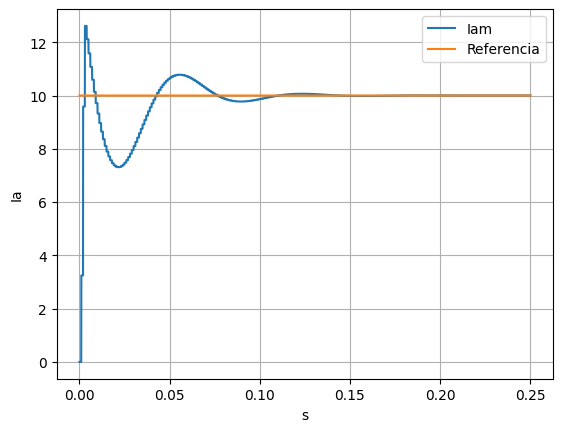

In [ ]:
data = np.loadtxt('controlador_corrente_10A.txt')

cut = 25000

tempo = data[:cut,0]
corrente_ref = data[:cut,1]
corrente = data[:cut,2]

print(f'Corrente Máxima = {np.max(corrente)}\n')

plt.plot(tempo, corrente, label="Iam")
plt.plot(tempo, corrente_ref, label="Referencia")
plt.legend()
plt.grid()
plt.xlabel('s')
plt.ylabel('Ia')

plt.savefig("DadosDeCorrente.pdf")

plt.show()

RPM Máximo = 2260.8460601526176



/tmp/ipython-input-4-1535820922.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("DadosDeRPM_degrau.pdf")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


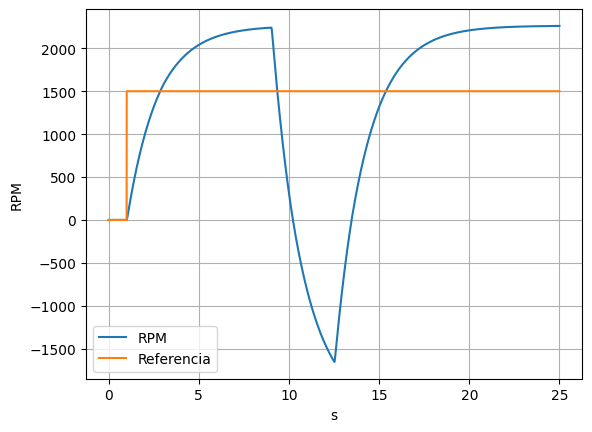

In [ ]:
data = np.loadtxt('controle_velocidade_degrau (1).txt')

cut = None

tempo = data[:cut,0]
RPM_ref = data[:cut,1]
RPM = data[:cut,2]

print(f'RPM Máximo = {np.max(RPM)}\n')

plt.plot(tempo, RPM, label="RPM")
plt.plot(tempo, RPM_ref, label="Referencia")
plt.legend()
plt.grid()
plt.xlabel('s')
plt.ylabel('RPM')

plt.savefig("DadosDeRPM_degrau.pdf")

plt.show()

RPM Máximo = 1000.0000000000001



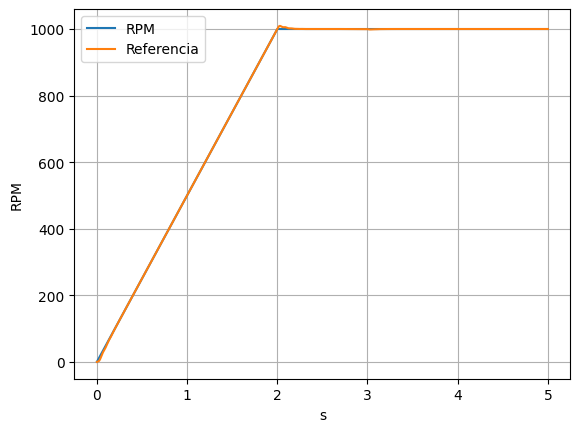

In [ ]:
data = np.loadtxt('controle_velocidade_rampa.txt')

cut = None

tempo = data[:cut,0]
RPM_ref = data[:cut,1]
RPM = data[:cut,2]

print(f'RPM Máximo = {np.max(RPM)}\n')

plt.plot(tempo, RPM, label="RPM")
plt.plot(tempo, RPM_ref, label="Referencia")
plt.legend()
plt.grid()
plt.xlabel('s')
plt.ylabel('RPM')

plt.savefig("DadosDeRPM_rampa.pdf")

plt.show()

RPM Máximo = 1000.0000000000001



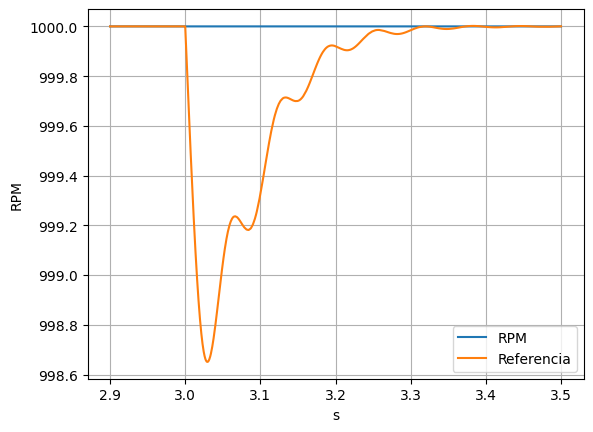

In [ ]:
data = np.loadtxt('controle_velocidade_rampa.txt')

cut1 = 290000
cut2 = 350000

tempo = data[cut1:cut2,0]
RPM_ref = data[cut1:cut2,1]
RPM = data[cut1:cut2,2]

print(f'RPM Máximo = {np.max(RPM)}\n')

plt.plot(tempo, RPM, label="RPM")
plt.plot(tempo, RPM_ref, label="Referencia")
plt.legend()
plt.grid()
plt.xlabel('s')
plt.ylabel('RPM')

plt.savefig("DadosDeRPM_rampa_carga.pdf")

plt.show()

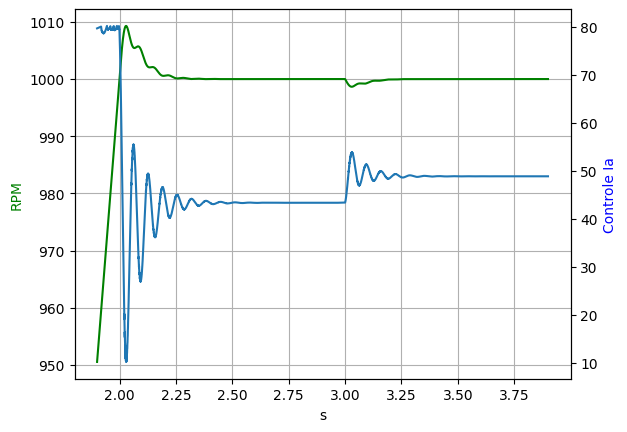

In [ ]:
data = np.loadtxt('dadosTudo.txt')

cut1 = 190000
cut2 = 390000

tempo = data[cut1:cut2,0]
controleIa = data[cut1:cut2,1]
controleRPM = data[cut1:cut2,2]
RPM = data[cut1:cut2,3]
RPMref = data[cut1:cut2,4]

fig, ax1, = plt.subplots()

ax1.plot(tempo, RPM, label="RPM", color='g')
ax1.set_ylabel('RPM', color='g')
ax1.grid(True)
ax1.axis('tight')
ax1.set_xlabel('s')

ax2 = ax1.twinx()

ax2.plot(tempo, controleIa, label="controleIA")
ax2.set_ylabel('Controle Ia', color='b')
ax2.axis('tight')

plt.sav

plt.show()

# Simulação 02 de ACEPOT/ACME



In [ ]:
# MOTOR
Ra = 0.75 #Ohm (Resistencia do rotor)
La = 0.015 #H (Indutancia do rotor)
Rf = 80 #Ohm (Resistencia do estator)
Lf = 0.025 #H (Indutancia do estator)
J = 0.2 #kg*m^2
Vt = 100 #V
Ia = 10 #A
n = 2000 #rpm
wn_motor = n * 2 * np.pi / 60 #rad/s

KE = 1
KT = 1

# CARGA
Tc = 2 #N*m
JL = 0.4

# PARSMETROS DE PROJETO DE CONTROLADOR
# Tss >= 4* ta
Mp = 25 / 100

In [ ]:
# Contstante de tempo
# da malha de corrente

te = La / Ra
print(f'te = {te} s')

# Tempo de acomodacao da resposta
# da corrente
Tss_i = 5 * te
print(f'Tss_i = {Tss_i} s')

# Tempo de acomodacao da resposta
# da velocidade
Tss_v = 10 * Tss_i
print(f'Tss_v = {Tss_v} s')

te = 0.02 s
Tss_i = 0.1 s
Tss_v = 1.0 s


In [ ]:
# coeficiente de amortecimento
E = np.sqrt((np.log(Mp)**2) / (np.pi**2 + np.log(Mp)**2))
print(f'E = {E}')

# frequencia do sistema
wn = 4 / (Tss_i*E)
print(f"wn = {wn}")

Ewn = wn*E
print(f'E*wn = {2*Ewn}')

E = 0.40371275194342066
wn = 99.08034811247651
E*wn = 80.0


# Controlador de Corrente

Polinômio característico de segundo grau:
$P(s) = s^2 + 2 ω_n \xi s + ω_n$


Polinômio característico da malha de corrente:
$P(s) = s^2 + (\frac{Ra}{La} + \frac{K_{pi}}{L_a})s + \frac{K_{il}}{La}$

$  (\frac{Ra}{La} + \frac{K_{pi}}{L_a}) = 2 ω_n \xi$


$ \frac{K_{il}}{La} = \omega_n ^2$

In [ ]:
Kpl = La * (2*Ewn - Ra / La)
print(f'Kpl = {Kpl}')

Kil = wn**2 * La
print(f'Kil = {Kil}')

til = Kpl / Kil
print(f'til = {til}')

Kpl = 0.44999999999999996
Kil = 147.25373073134293
til = 0.0030559497390324356


# Controlador de Velocidade

Polinômio característico de segundo grau:
$P(s) = s^2 + 2 ω_n \xi s + ω_n$


Polinômio característico da malha de corrente:
$P(s) = s^2 + (\frac{K_{pv}}{J_{eq}})s +(\frac{K_{iv}}{J_{eq}})$

$  (\frac{K_{pv}}{J_{eq}}) = 2 ω_n \xi$


 $\frac{K_{iv}}{J_{eq}} = \omega_n ^2$

In [ ]:
wn = 4 / (E*Tss_v)
print(f'wm = {wn}')

Jeq = J + JL
print(f'Jeq = {Jeq}')

Kpv = Jeq * 2*wn*E
print(f'Kpv = {Kpv}')

Kiv = wn**2 * Jeq
print(f'Kiv = {Kiv}')

tv = Kpv / Kiv
print(f'tv = {tv}')

wm = 9.908034811247651
Jeq = 0.6000000000000001
Kpv = 4.800000000000001
Kiv = 58.90149229253717
tv = 0.08149199304086496


# Dados de Terceiros

In [ ]:
# MOTOR
Ra = 0.75 #Ohm (Resistencia do rotor)
La = 0.015 #H (Indutancia do rotor)
Rf = 80 #Ohm (Resistencia do estator)
Lf = 0.025 #H (Indutancia do estator)
J = 0.2 #kg*m^2
Vt = 100 #V
Ia = 10 #A
n = 2000 #rpm
wn_motor = n * 2 * np.pi / 60 #rad/s

KE = 1
KT = 1

# CARGA
Tc = 2 #N*m
JL = 0.4

# PARSMETROS DE PROJETO DE CONTROLADOR
# Tss >= 4* ta
Mp = 25 / 100

# Contstante de tempo
# da malha de corrente

te = La / Ra
print(f'te = {te} s')

# Tempo de acomodacao da resposta
# da corrente
Tss_i = 5 * te
print(f'Tss_i = {Tss_i} s')

# Tempo de acomodacao da resposta
# da velocidade
Tss_v = 10 * Tss_i
print(f'Tss_v = {Tss_v} s')

# coeficiente de amortecimento

E = np.sqrt((np.log(Mp)**2) / (np.pi**2 + np.log(Mp)**2))
print(f'E = {E}')

# frequencia do sistema

wn = 4 / (Tss_i*E)
print(f"wn = {wn}")

Ewn = wn*E
print(f'E*wn = {2*Ewn}')

Kpl = La * (2*Ewn - Ra / La)
print(f'Kpl = {Kpl}')

Kil = wn**2 * La
print(f'Kil = {Kil}')

til = Kpl / Kil
print(f'til = {til}')

wn = 4 / (E*Tss_v)
print(f'wm = {wn}')

Jeq = J + JL
print(f'Jeq = {Jeq}')

Kpv = Jeq * 2*wn*E
print(f'Kpv = {Kpv}')

Kiv = wn**2 * Jeq
print(f'Kiv = {Kiv}')

tv = Kpv / Kiv
print(f'tv = {tv}')

te = 0.02 s
Tss_i = 0.1 s
Tss_v = 1.0 s
E = 0.40371275194342066
wn = 99.08034811247651
E*wn = 80.0
Kpl = 0.44999999999999996
Kil = 147.25373073134293
til = 0.0030559497390324356
wm = 9.908034811247651
Jeq = 0.6000000000000001
Kpv = 4.800000000000001
Kiv = 58.90149229253717
tv = 0.08149199304086496
